<a href="https://colab.research.google.com/github/yoshivarma/DataScience/blob/main/KNN_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from numpy.linalg import norm
from scipy.stats import mode
from sklearn.metrics import accuracy_score
import statistics
from statistics import stdev
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
#importing data
from google.colab import files
upload = files.upload()


Saving iris.csv to iris.csv


In [ ]:
#reading dataset
dataset = pd.read_csv('iris.csv', header = None)
dataset.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# shuffling, splitting data, normalizing
def Split_data(dataset):
  dataset = shuffle(dataset)
  X = dataset[dataset.columns[0:4]]
  y = dataset[dataset.columns[4]]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
  X_train_nonrmalized = (X_train-X_train.min())/(X_train.max()-X_train.min())
  X_test_normalized = (X_test-X_train.min())/(X_train.max()-X_train.min())
  return X_train_nonrmalized, X_test_normalized, y_train, y_test

In [ ]:
#euclidean dist
def squared_dist(x,y):
  d = 0.0
  d = np.sum(np.square(x-y))
  return np.sqrt(d)

In [ ]:
#k-NN algorithm
def k_NN(trainx, trainy, testx, k):
    
  
  inter = list()
  k_neighbours = list()
  for T in range(len(testx)):
    nearest_neighbour = list()
    for P in range(len(trainx)):
      x = squared_dist(testx.iloc[T],trainx.iloc[P])
      nearest_neighbour.append((trainy.iloc[P], x))
      
    nearest_neighbour.sort(key=lambda tup: tup[1])

    z1 = nearest_neighbour[:k]
    z2 = [list(x) for x in z1]
    for row in z2:
      del row[1]
    z3 = mode(z2)
    z3 = z3.mode[0]

    k_neighbours.append(z3)

  return k_neighbours

In [ ]:
#prediting values
def predictions(predict, y_test):
  count = 0
  array = y_test.to_numpy()
  for i in range(len(predict)):
    if (predict[i] == array[i]):
      count = count+1

  score = (count / (len(predict)))
  return score

In [ ]:
# testing for training data

def testing_training_k(data):

  prediction_train = list()
  sd_train = list()
  standard_train = list()

  #test for k= 1,51 for odd values
  for j in range(1,51,2):
    score = 0.0
    avg_score = 0.0
    num = 20
    
    #testing for 20 times
    for i1 in range(num):
      X_train_normalized, X_test_normalized, y_train, y_test = Split_data(data)
      count = 0.0
      x = k_NN(X_train_normalized, y_train, X_train_normalized, j)

      array = y_train.to_numpy()
      for i in range(len(x)):
        if (x[i] == array[i]):
          count = count+1

      score = (count / (len(x)))
      avg_score = avg_score + score
      #appending each score to find standard deviation at the end
      sd_train.append(score)
  
  #average for 20 iterations, standard deviation
    avg_score_20 = avg_score/num
    standard_train.append(statistics.stdev(sd_train))
    prediction_train.append(avg_score_20)
  
  return prediction_train, standard_train

In [ ]:
# testing for testing data

def testing_testing_k(data):

  prediction_test = list()
  sd_test = list()
  standard_test = list()

  #test for k= 1,51 for odd values
  for j in range(1,51,2):
    score = 0.0
    avg_score = 0.0
    num = 20
    
    #testing for 20times
    for i1 in range(num):
      X_train_normalized, X_test_normalized, y_train, y_test = Split_data(data)
      count = 0.0
      x = k_NN(X_train_normalized, y_train, X_test_normalized, j)

      array = y_test.to_numpy()
      for i in range(len(array)):
        if (x[i] == array[i]):
          count = count+1

      score = (count / (len(array)))
      avg_score = avg_score + score
      #appending each score to find standard deviation at the end
      sd_test.append(score)
  
  #average for 20 iterations, standard deviation
    avg_score_20 = avg_score/num
    standard_test.append(statistics.stdev(sd_test))
    prediction_test.append(avg_score_20)
  
  return prediction_test, standard_test

In [ ]:
prediction_train, standard_train = testing_training_k(dataset)

In [ ]:
prediction_test, standard_test = testing_testing_k(dataset)

In [ ]:
#checking accuracy for k= 120
X_train_normalized, X_test_normalized, y_train, y_test = Split_data(dataset)
count = 0.0
x = k_NN(X_train_normalized, y_train, X_test_normalized, 120)

array = y_test.to_numpy()
for i in range(len(array)):
  if (x[i] == array[i]):
    count = count+1

score = (count / (len(array)))
score

0.26666666666666666

In [ ]:
#checking accuracy for k =151
X_train_normalized, X_test_normalized, y_train, y_test = Split_data(dataset)
count = 0.0
x = k_NN(X_train_normalized, y_train, X_test_normalized, 151)

array = y_test.to_numpy()
for i in range(len(array)):
  if (x[i] == array[i]):
    count = count+1

score = (count / (len(array)))
score

0.26666666666666666

In [ ]:
#checking accuracy for k= 131
X_train_normalized, X_test_normalized, y_train, y_test = Split_data(dataset)
count = 0.0
x = k_NN(X_train_normalized, y_train, X_test_normalized, 131)

array = y_test.to_numpy()
for i in range(len(array)):
  if (x[i] == array[i]):
    count = count+1

score = (count / (len(array)))
score

0.26666666666666666

**Q1.1 (12 Points) In the first graph, you should show the value of k on the horizontal axis,
and on the vertical axis, the average accuracy of models trained over the training set, given
that particular value of k. Also show, for each point in the graph, the corresponding standard
deviation; you should do this by adding error bars to each point. The graph should look like the
one in Figure 2 (though the “shape” of the curve you obtain may be different, of course).**

<ErrorbarContainer object of 3 artists>

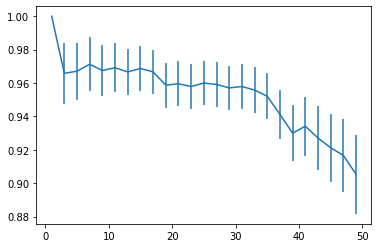

In [ ]:
#Accuracy curve for tarining data

#define x and y coordinates
x = np.array(range(1,51,2))
y = np.array(prediction_train)

#create line chart with error bars
fig, ax = plt.subplots()


#plt.plot(x, y)
fig.savefig('testing_data1.png')
ax.errorbar(x, y,
             yerr = standard_train,
             capsize=0.001)

**Q1.2 (12 Points) In the second graph, you should show the value of k on the horizontal axis,
and on the vertical axis, the average accuracy of models trained over the testing set, given
that particular value of k. Also show, for each point in the graph, the corresponding standard
deviation by adding error bars to the point.**

<ErrorbarContainer object of 3 artists>

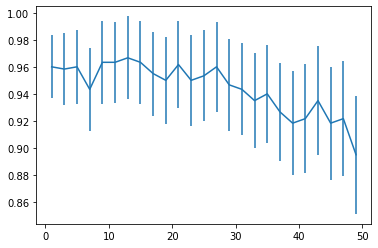

In [ ]:
#Accuracy curve for testing data

#define x and y coordinates
x = np.array(range(1,51,2))
y = np.array(prediction_test)

#create line chart with error bars
fig, ax = plt.subplots()


#plt.plot(x, y)
ax.errorbar(x, y,
             yerr = standard_test,
             capsize=0.001)

**Explain intuitively why each of these curves look the way they do. First,
analyze the graph showing performance on the training set as a function of k. Why do you think
the graph looks like that? Next, analyze the graph showing performance on the testing set as a
function of k. Why do you think the graph looks like that?**

*Performance on training data*: Firstly, when k=1, the accuracy on training data is 100% this is expected because the algorithm was trained on this data. But when we keep on increasing k-values in this case from k=1, to k=51 (odd values) accuracy decreases. I see with the above algorithm the range of accuracies is between 88% to 100%. When I tested some extreme values of k such as 120,131,151,etc. I see accuracy gets constant close to 26% this is because no matter whatever the k-value is, its just returning the maximum number of target labels on the whole dataset. One observation point- with increasing k-values standard deviation increases. This is because the bigger the k-value, the less accurate predictions are.

*Performance on testing data*:
Now, when we predict target labels on testing data using this algorithm, I see accuracies initially increase with k values until k=13. There was 97% accuracy for testing data when k=13. By testing on various datasets, we can know with which 'k' value algorithm performs better. Though accuracies didn't fall much with increasing k, but with k=120,131,151,etc. a similar phenomenon was observed accuracy gets constant. Even with testing data accuracy decreases with increasing k. Standard deviation fluctuates between 2.3 to 4.3, which is quite high in comparison to training data where deviation ranged between 0 to 2.3.

**Q1.4 (8 Points) We say that a model is underfitting when it performs poorly on the training
data (and most likely on the testing data as well). We say that a model is overfitting when it
performs well on training data but it does not generalize to new instances. Identify and report
the ranges of values of k for which k-NN is underfitting, and ranges of values of k for which
k-NN is overfitting.**

*Underfitting*: When we increase k values model gets underfitted. For k = (87 and above) models are underfitting. Accuracies decrease highly from k = 53 and get lower as k increases to 87. For example, k= 51 accuracy= 88% but when we increase to k=53 accuracy decreases to 72.33%.

*Overfitting*: When k=1 algorithm performs well for training data whereas for testing data this is not the case. So, for k=1 the model is overfitiing. Apart from them accuracies I didn't see any 'k' where accuracies based on training data are well but bad for testing data. Model performs moderately for both testing and training data for various k-values. Graphs for training and testing data follow a similar curve. Which can also resemble that k-NN is not overfitting for any k-values based on this dataset.



**Q1.5 (8 Points) Based on the analyses made in the previous question, which value of k you
would select if you were trying to fine-tune this algorithm so that it worked as well as possible in
real life? Justify your answer.**

After analyzing and visualizing all the accuracies for training data, the algorithm performs well for k = 3 to 19. Accuracies constantly increased between these ranges. Based on the graph for testing data accuracies model can fit best for k=7, to 11. However, this can varry with datasets as algorithm can perform differently with different datasets. There can be many factors which can contribute to better performance of an algorithm one of them could be size of the dataset. With the iris dataset algorithm performed well for all k values between 1 to 57. This could be majorly because of less number of attributes for each target label.